<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.project/blob/main/SCM_sub2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [5]:
Data = pd.read_excel('시계열_수요예측_데이터_2.xlsx')

In [6]:
Data['Date'].value_counts() #한날에 수요정보 여러개 있는건 뭐지? 창고다른건 여러개 있다쳐도.

2012-01-10    4
2015-03-18    4
2012-10-01    4
2013-04-24    3
2014-11-25    3
             ..
2014-01-21    1
2013-09-19    1
2014-09-09    1
2014-08-12    1
2012-12-03    1
Name: Date, Length: 469, dtype: int64

In [7]:
Data.describe(), Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      597 non-null    object        
 1   Warehouse         597 non-null    object        
 2   Product_Category  597 non-null    object        
 3   Date              597 non-null    datetime64[ns]
 4   Order_Demand      597 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 23.4+ KB


(       Order_Demand
 count    597.000000
 mean     770.519263
 std     1016.921545
 min        0.000000
 25%      200.000000
 50%      300.000000
 75%     1000.000000
 max     7000.000000, None)

#데이터 전처리

In [8]:
# 수요음수값 제거했음
Data[Data['Order_Demand']<0] 

,Product_Code,Warehouse,Product_Category,Date,Order_Demand


In [9]:
Data["Day"]=Data["Date"].dt.dayofweek # 요일
Data['Month'] = Data['Date'].dt.month # 월
Data['year'] = Data['Date'].dt.year # 년도

In [21]:
Data["Season"] = ""

for i in Data.index:
  if 3 <= Data['Month'][i] <= 5:
    Data['Season'][i] = 1
  elif 6<= Data['Month'][i] <= 8:
    Data['Season'][i] = 2
  elif 9<= Data['Month'][i] <= 11:
    Data['Season'][i] = 3
  else:
    Data["Season"][i] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-package

In [10]:
Data['year_month'] = pd.to_datetime(Data['Date']).dt.to_period('M') # 월별 집계를 위한 년-월 생성

In [11]:
Data = Data[Data['year']!=2011] #2011년은 2값으로만 이루어져있어 대표성이 없고 유용하지 않다고 판단, 제거했음.
Data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day,Month,year,year_month
2,Product_0001,Whse_A,Category_005,2012-01-03,200,1,1,2012,2012-01
3,Product_0001,Whse_A,Category_005,2012-01-03,800,1,1,2012,2012-01
4,Product_0001,Whse_A,Category_005,2012-01-04,200,2,1,2012,2012-01
5,Product_0001,Whse_J,Category_005,2012-01-05,100,3,1,2012,2012-01
6,Product_0001,Whse_A,Category_005,2012-01-09,2000,0,1,2012,2012-01
...,...,...,...,...,...,...,...,...,...
592,Product_0001,Whse_J,Category_005,2016-12-14,200,2,12,2016,2016-12
593,Product_0001,Whse_A,Category_005,2016-12-15,200,3,12,2016,2016-12
594,Product_0001,Whse_J,Category_005,2016-12-19,500,0,12,2016,2016-12
595,Product_0001,Whse_J,Category_005,2016-12-22,300,3,12,2016,2016-12


In [22]:
Data['Day'].value_counts() # 월~금 평일에만 장사한다.(수요발생)

0    131
3    119
2    116
1    115
4    114
Name: Day, dtype: int64

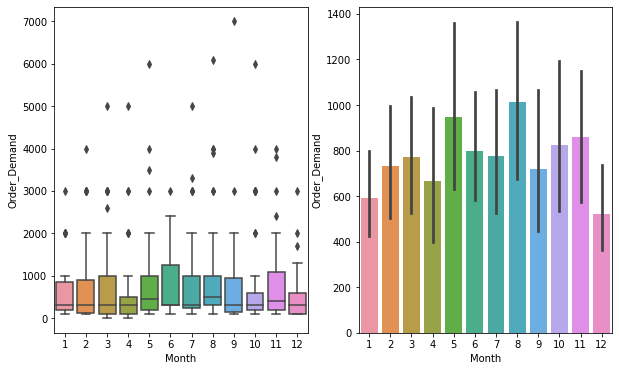

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(x="Month",y="Order_Demand",data=Data)
plt.subplot(122)
sns.barplot(x="Month",y="Order_Demand",data=Data)

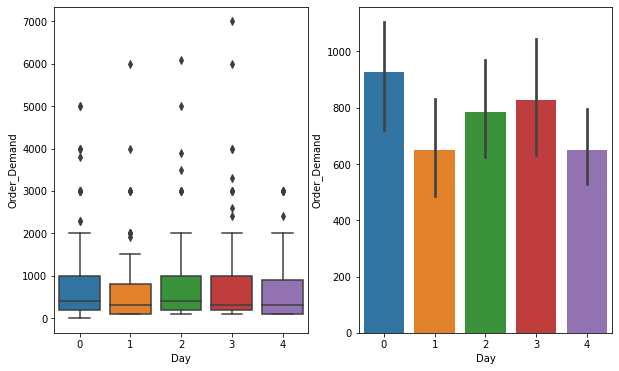

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(x="Day",y="Order_Demand",data=Data)
plt.subplot(122)
sns.barplot(x="Day",y="Order_Demand",data=Data)

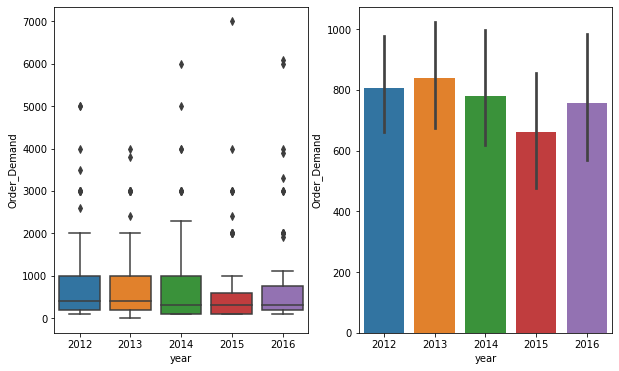

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(x="year",y="Order_Demand",data=Data)
plt.subplot(122)
sns.barplot(x="year",y="Order_Demand",data=Data)

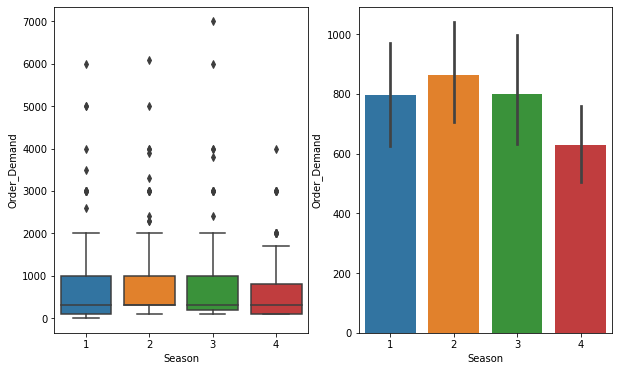

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(x="Season",y="Order_Demand",data=Data)
plt.subplot(122)
sns.barplot(x="Season",y="Order_Demand",data=Data)

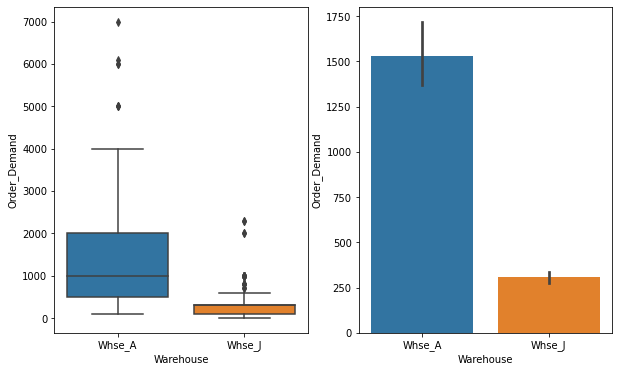

In [57]:
plt.figure(figsize=(10,6)) #창고 종류가 가장 차이가 큰 변수였음.
plt.subplot(121)
sns.boxplot(x="Warehouse",y="Order_Demand",data=Data)
plt.subplot(122)
sns.barplot(x="Warehouse",y="Order_Demand",data=Data)

In [16]:
Data.groupby('year_month')['Order_Demand'].mean(),Data.groupby('year_month')['Order_Demand'].count()

(year_month
 2012-01     646.666667
 2012-02    1000.000000
 2012-03    1084.615385
 2012-04     471.428571
 2012-05     930.000000
 2012-06     914.285714
 2012-07    1010.000000
 2012-08     664.285714
 2012-09     744.444444
 2012-10     850.000000
 2012-11     672.727273
 2012-12     600.000000
 2013-01     985.714286
 2013-02    1011.111111
 2013-03    1100.000000
 2013-04     700.000000
 2013-05     422.222222
 2013-06     970.000000
 2013-07     750.000000
 2013-08     880.000000
 2013-09     644.444444
 2013-10     950.000000
 2013-11    1100.000000
 2013-12     536.363636
 2014-01     688.888889
 2014-02     500.000000
 2014-03     590.000000
 2014-04     975.000000
 2014-05     900.000000
 2014-06    1100.000000
 2014-07     561.111111
 2014-08     721.428571
 2014-09     635.714286
 2014-10    1557.142857
 2014-11     953.846154
 2014-12     625.000000
 2015-01     437.500000
 2015-02     568.750000
 2015-03     450.000000
 2015-04     580.000000
 2015-05     900.000000
 201

# 분석용 excel Data 생성 및 내보내기

In [28]:
grouped_Data = Data.groupby('year_month')['Order_Demand'].sum()

In [29]:
grouped_Data.describe()

count       60.000000
mean      7661.666667
std       3902.415231
min        600.000000
25%       5000.000000
50%       6950.000000
75%       9800.000000
max      17500.000000
Name: Order_Demand, dtype: float64

In [30]:
grouped_Data

year_month
2012-01     9700
2012-02    13000
2012-03    14100
2012-04     3300
2012-05     9300
2012-06     6400
2012-07    10100
2012-08     9300
2012-09     6700
2012-10    17000
2012-11     7400
2012-12     6000
2013-01     6900
2013-02     9100
2013-03    12100
2013-04     7000
2013-05     3800
2013-06     9700
2013-07     9000
2013-08     4400
2013-09     5800
2013-10    11400
2013-11    13200
2013-12     5900
2014-01     6200
2014-02     5000
2014-03     5900
2014-04     7800
2014-05     6300
2014-06    12100
2014-07    10100
2014-08    10100
2014-09     8900
2014-10    10900
2014-11    12400
2014-12     5000
2015-01     3500
2015-02     9100
2015-03     7200
2015-04     5800
2015-05     5400
2015-06     4000
2015-07     6500
2015-08    11400
2015-09     9000
2015-10     2300
2015-11     4200
2015-12     2200
2016-01     2100
2016-02     6300
2016-03     9300
2016-04     3400
2016-05    16900
2016-06     5300
2016-07     9300
2016-08    17500
2016-09     3300
2016-10     2100
201

In [ ]:
#grouped_Data.to_excel("handed_sub2.xlsx") # 년월+수요정보만 있는 excel파일

# 실험용 코드 미리 짜놓기(머신러닝 기법이 통할까?)

In [31]:
train, test = Data[Data['year']!=2016], Data[Data['year']==2016]

In [32]:
train_x,train_y = train.loc[:,train.columns!='Order_Demand'], train.loc[:,'Order_Demand']

In [33]:
test_x, test_y = test.loc[:,train.columns!='Order_Demand'], test.loc[:,'Order_Demand']

In [34]:
train_x, train_y

(     Product_Code Warehouse Product_Category  ...  year  year_month  Season
 2    Product_0001    Whse_A     Category_005  ...  2012     2012-01       4
 3    Product_0001    Whse_A     Category_005  ...  2012     2012-01       4
 4    Product_0001    Whse_A     Category_005  ...  2012     2012-01       4
 5    Product_0001    Whse_J     Category_005  ...  2012     2012-01       4
 6    Product_0001    Whse_A     Category_005  ...  2012     2012-01       4
 ..            ...       ...              ...  ...   ...         ...     ...
 489  Product_0001    Whse_J     Category_005  ...  2015     2015-12       4
 490  Product_0001    Whse_J     Category_005  ...  2015     2015-12       4
 491  Product_0001    Whse_A     Category_005  ...  2015     2015-12       4
 492  Product_0001    Whse_J     Category_005  ...  2015     2015-12       4
 493  Product_0001    Whse_J     Category_005  ...  2015     2015-12       4
 
 [492 rows x 9 columns], 2       200
 3       800
 4       200
 5       10

# train,test 전처리

In [55]:
# 어느 창고인가의 유무에 따라 1 또는 0의 이진변수로 전환
train_x['Warehouse'] = np.where(train_x['Warehouse']=='Whse_A',1,0)

test_x['Warehouse'] = np.where(test_x['Warehouse']=='Whse_J',1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
train_x

,Product_Code,Warehouse,Product_Category,Date,Day,Month,year,year_month,Season
2,Product_0001,1,Category_005,2012-01-03,1,1,2012,2012-01,4
3,Product_0001,1,Category_005,2012-01-03,1,1,2012,2012-01,4
4,Product_0001,1,Category_005,2012-01-04,2,1,2012,2012-01,4
5,Product_0001,0,Category_005,2012-01-05,3,1,2012,2012-01,4
6,Product_0001,1,Category_005,2012-01-09,0,1,2012,2012-01,4
...,...,...,...,...,...,...,...,...,...
489,Product_0001,0,Category_005,2015-12-07,0,12,2015,2015-12,4
490,Product_0001,0,Category_005,2015-12-08,1,12,2015,2015-12,4
491,Product_0001,1,Category_005,2015-12-09,2,12,2015,2015-12,4
492,Product_0001,0,Category_005,2015-12-16,2,12,2015,2015-12,4


In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model = DecisionTreeRegressor(max_depth=5)
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
feature_names=['Warehouse','Day','Month','Season']
label = 'Order_Demand'

In [61]:
X_train = train_x[feature_names]
X_test = test_x[feature_names]

In [64]:
y_train = train[label]
y_test = test[label]

In [65]:
model.fit(X_train,y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
from sklearn.tree import export_graphviz
import graphviz

In [67]:
dot_tree=export_graphviz(model,feature_names=feature_names,out_file=None)

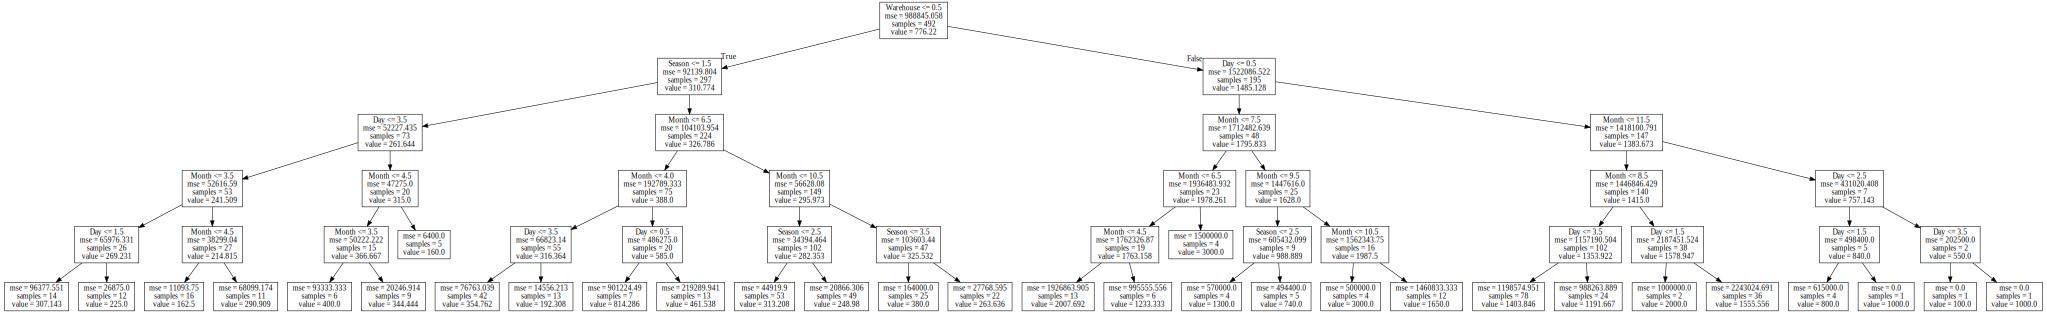

In [68]:
graphviz.Source(dot_tree)

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

predictions = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test,predictions)

In [70]:
mape

425.73288560722455